In [1]:
# D. Cashon
# 2019 04 24
# Part A, HW2

## Notes (for personal ref)
### Min - Max Normalization
Maps dataset values to [0, 1]

Here, we normalize the data features, which amounts to the columns of X

In [3]:
import os
from pathlib import Path
import pickle
import numpy as np
# get the data paths
working_dir = Path("C:/Users/dcash/Documents/ee596/spr2019_ee596/hw2")
data_path = working_dir / "data/cifar-10-batches-py"

In [4]:
# ALL FUNCTIONS
def unpickle(file):
    with open(file, 'rb') as fo:
        d1 = pickle.load(fo, encoding='utf8')
    return d1

In [62]:
# get paths to the 5 training and 1 test set
all_data = []
for i in os.listdir(data_path):
    if 'batch_' in str(i) or 'test_' in str(i):
        all_data.append(data_path / i)

# load all the data into np array
train_data, train_labels = [], []
for paths in all_data:
    temp = unpickle(paths)
    if 'batch_' in str(paths):
        train_data.append(temp[b'data'])
        train_labels.append(temp[b'labels'])
    elif 'test' in str(paths):
        test_data_np = temp[b'data']
        test_labels_np = temp[b'labels']
train_data_np = np.concatenate(train_data)
train_labels_np = np.concatenate(train_labels)

# perform min-max normalization of features (columns)
# train
train_max = np.max(train_data_np, axis=0)
train_min = np.min(train_data_np, axis=0)
train_data_np_norm = (train_data_np - train_min) / (train_max - train_min)
# test
test_max = np.max(test_data_np, axis=0)
test_min = np.min(test_data_np, axis=0)
test_data_np_norm = (test_data_np - test_min) / (test_max - test_min)

# perform 1-hot encoding of all labels
# labels in [0, 9] => 10 element vectors
train_hot_labels = np.zeros((50000, 10))
for i, labels in enumerate(train_labels_np):
    train_hot_labels[i, labels] = 1
test_hot_labels = np.zeros((10000, 10))
for i, labels in enumerate(test_labels_np):
    test_hot_labels[i, labels] = 1

In [68]:
yolo = unpickle(all_data[1])

In [72]:
yolo.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [79]:
metafile = data_path / 'batches.meta'
with open(metafile, 'rb') as foo:
    tit = pickle.load(foo, encoding='bytes')

In [82]:
tit[b'label_names']


[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [83]:
import matplotlib.pyplot as plt

9

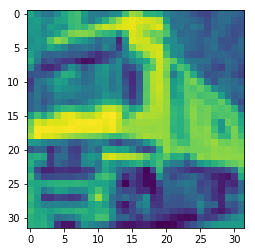

In [90]:
plt.imshow(np.reshape(train_data_np[1,:1024], (32, 32)))
train_labels_np[1]

In [17]:
metadata = data_path / 'batches.meta'

In [18]:
t1 = unpickle(metadata)

In [22]:
type(t1['label_names'][0])

str

In [26]:
from load_cifar2 import load_label_names, features_reshape

In [24]:
yolo = load_label_names(data_path)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [15]:
from load_cifar import *
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pickle
import numpy as np
# get the data paths
working_dir = Path("C:/Users/dcash/Documents/ee596/spr2019_ee596/hw2")
data_path = working_dir / "data/cifar-10-batches-py"
def unpickle(file):
    with open(file, 'rb') as fo:
        d1 = pickle.load(fo, encoding='utf8')
    return d1

In [16]:
xdata, xlabels = load_training_batch(data_path, 1)

In [5]:
t1 = features_reshape(xdata)

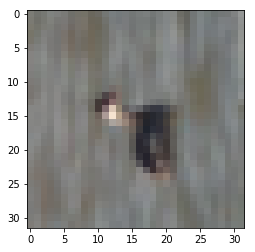

In [13]:
plt.imshow(t1[1500,:,:,:])

In [5]:
x_normalized = normalize(xdata)

In [6]:
x_onehot = one_hot_encoding(xlabels)

In [7]:
x_onehot[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

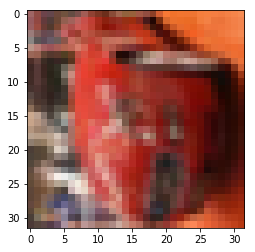

In [8]:
plt.imshow(t1[5,:,:,:])

In [9]:
preprocess_and_save(xdata, xlabels, 'yolo.pkl')

0

In [10]:
0.1 * 50000

5000.0

In [14]:
yolo = [data_path / ('data_batch_' + str(n)) for n in range(1,6)]

In [2]:
preprocess_data(data_path)

0

In [2]:
yolo = unpickle('val_processed.pkl')

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

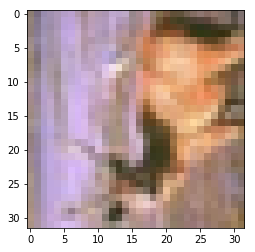

In [3]:
plt.imshow(np.reshape(yolo['data'][0], (32, 32, 3), order='F'))
yolo['labels_onehot'][0]

In [4]:
t1 = yolo['data']
t2 = yolo['labels_onehot']

In [4]:
b1 = load_preprocessed_training_batch(1, 128)

[[0.62745098 0.58431373 0.61960784 ... 0.23137255 0.22745098 0.21960784]
 [0.28235294 0.47058824 0.53333333 ... 0.24313725 0.27058824 0.28235294]
 [0.16078431 0.27058824 0.3254902  ... 0.30588235 0.28627451 0.30196078]
 ...
 [0.00392157 0.00392157 0.00392157 ... 0.91764706 0.90588235 0.90588235]
 [0.09803922 0.09803922 0.09411765 ... 0.30196078 0.18431373 0.31764706]
 [0.75686275 0.79215686 0.79607843 ... 0.07058824 0.0745098  0.06666667]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
truck


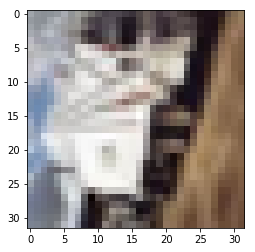

In [9]:
k1, k2 = next(b1)
print(k1)
print(k2)
plt.imshow(np.reshape(k1[0], (32, 32, 3), order='F'))
print(k2[0])
lel = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(lel[np.argmax(k2[0])])

array([[255, 253, 253, ...,  83,  83,  84],
       [154, 126, 105, ..., 139, 142, 144]], dtype=uint8)